# SVM with Kernel for Iris_data

# 1.Data visualization

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

#### The only two-dimensional feature of X is to facilitate the visualization of the results after SVM. The final scatter plot is a 2D plan. The horizontal and vertical axes have only two dimensions, so only the length and width of the calyx are taken here. 

In [48]:
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [49]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### It should be noted that y has only three values of 0, 1, and 2, which corresponds to only three categories in the classification problem.

In [50]:
h = .02  # 网格中的步长

# 创建支持向量机实例，并拟合出数据
C = 1.0  # SVM正则化参数
svc = svm.SVC(kernel='linear', C=C).fit(X, y) # 线性核
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y) # 径向基核
poly_svc = svm.SVC(kernel='poly', gamma='auto',degree=3, C=C).fit(X, y) # 多项式核
lin_svc = svm.LinearSVC(C=C).fit(X, y) #线性核

C:\Users\caoguolin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### There are four SVM models set here, which are linear kernel, Gaussian kernel, polynomial kernel and linear SVM. The difference between the first kernel and the fourth is that one is a linear kernel SVM and one is a linear SVM. The decision boundaries of the two are slightly different. The difference is that the former minimizes the squared loss of the hinge function, the latter minimizes the loss of the hinge function, and the former uses 1: 1 to classify, while the latter uses 1 to all to classify.

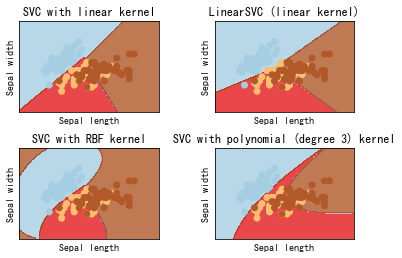

In [51]:
# 创建网格，以绘制图像
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 图的标题
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # 绘出决策边界，不同的区域分配不同的颜色
    plt.subplot(2, 2, i + 1) # 创建一个2行2列的图，并以第i个图为当前图
    plt.subplots_adjust(wspace=0.4, hspace=0.4) # 设置子图间隔

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #将xx和yy中的元素组成一对对坐标，作为支持向量机的输入，返回一个array
    
    # 把分类结果绘制出来
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) #使用等高线的函数将不同的区域绘制出来

    # 将训练数据以离散点的形式绘制出来
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### The above four graphs are the scatter plots of the results of the four types of SVM training. It can be found from the images that the boundaries of the four SVMs are different. The linear kernel SVM and the linear SVM boundary are linear, while the Gaussian kernel SVM The boundary of the sum polynomial kernel SVM is non-linear. The specific shape of these curve boundaries depends on the kernel function and the parameters of the kernel function.

## Summary:

#### This part is a simple example of processing Iris_data for the four SVN models. The parameters of the model are basically the default parameters, mainly to show the SVM process and the characteristics of the four models. Although the final drawing reflects their own characteristics, the accuracy is not high, and only two-dimensional features are taken here because high-dimensional features cannot be used for mapping.



# 2.Model performance comparison

In [52]:
import time 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

#乱码设置
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

iris = datasets.load_iris()
x = iris.data
y = iris.target

#### Import some necessary packages, including data segmentation module, model result evaluation module, drawing module, time module, model module, data source module, etc.

In [53]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [54]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### The three values of y still represent the three categories of iris.

In [55]:
#将y转化为数字标签
y=pd.Categorical(y).codes


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=88,train_size=0.7)


svm1 = SVC(C=1, kernel='linear',gamma='auto')
svm2 = SVC(C=1, kernel='rbf',gamma='auto')
svm3 = SVC(C=1, kernel='poly',gamma='auto')
svm4 = SVC(C=1, kernel='sigmoid',gamma='auto')

#### Segment the data set and build the kernel SVM model. There are still four models: linear kernel SVM, Gaussian kernel SVM, polynomial kernel SVM, and sigmoid kernel SVM. The parameters are still set here as default parameters.

In [56]:
t0=time.time()
svm1.fit(x_train,y_train)
t1=time.time()
svm2.fit(x_train,y_train)
t2=time.time()
svm3.fit(x_train,y_train)
t3=time.time()
svm4.fit(x_train,y_train)
t4=time.time()

#### Model training and setting time points

In [57]:
print("SVM-linear的运行时间："+str(t1-t0))
print("SVM-rbf的运行时间："+str(t2-t1))
print("SVM-poly的运行时间："+str(t3-t2))
print("SVM-sigmoid的运行时间："+str(t4-t3))

SVM-linear的运行时间：0.001998424530029297
SVM-rbf的运行时间：0.0009996891021728516
SVM-poly的运行时间：0.001001119613647461
SVM-sigmoid的运行时间：0.0019974708557128906


#### Output the running time of the four models. 

In [61]:
svm1_train_score=accuracy_score(y_train,svm1.predict(x_train))
svm1_test_score=accuracy_score(y_test,svm1.predict(x_test))
svm2_train_score=accuracy_score(y_train,svm2.predict(x_train))
svm2_test_score=accuracy_score(y_test,svm2.predict(x_test))
svm3_train_score=accuracy_score(y_train,svm3.predict(x_train))
svm3_test_score=accuracy_score(y_test,svm3.predict(x_test))
svm4_train_score=accuracy_score(y_train,svm4.predict(x_train))
svm4_test_score=accuracy_score(y_test,svm4.predict(x_test))

#### The model result evaluation module is introduced to evaluate the training set score and test set score of each kernel SVM model.

In [62]:
print("SVM-linear的训练集准确率："+str(svm1_train_score))
print("SVM-linear的测试集准确率："+str(svm1_test_score))
print("SVM-rbf的训练集准确率："+str(svm2_train_score))
print("SVM-rbf的测试集准确率："+str(svm2_test_score))
print("SVM-poly的训练集准确率："+str(svm3_train_score))
print("SVM-poly的测试集准确率："+str(svm3_test_score))
print("SVM-sigmoid的训练集准确率："+str(svm4_train_score))
print("SVM-sigmoid的测试集准确率："+str(svm4_test_score))

SVM-linear的训练集准确率：0.9809523809523809
SVM-linear的测试集准确率：0.9777777777777777
SVM-rbf的训练集准确率：0.9904761904761905
SVM-rbf的测试集准确率：0.9333333333333333
SVM-poly的训练集准确率：1.0
SVM-poly的测试集准确率：0.9333333333333333
SVM-sigmoid的训练集准确率：0.37142857142857144
SVM-sigmoid的测试集准确率：0.24444444444444444


#### There are a total of eight scores, corresponding to the training and test sets of the four models. You can see that the output is not intuitive enough, so you need to graph it.

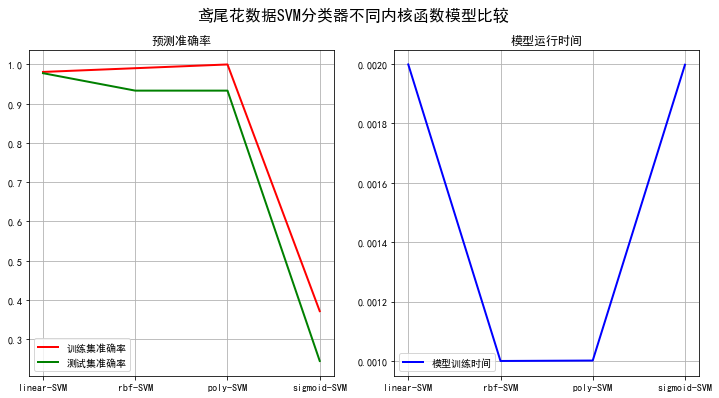

In [63]:
#设置X轴，y轴
x_tmp=[0,1,2,3]
y_train_tmp=[svm1_train_score,svm2_train_score,svm3_train_score,svm4_train_score]
y_test_tmp=[svm1_test_score,svm2_test_score,svm3_test_score,svm4_test_score]
y_score=[t1-t0,t2-t1,t3-t2,t4-t3]

#设置尺寸和颜色
plt.figure(facecolor='w',figsize=(12,6))

#subplot是用来分割画布，分割成一行两列，用第一列的来画图
a=plt.subplot(121)

#绘图
plt.plot(x_tmp,y_train_tmp,'r-',lw=2,label=u'训练集准确率')
plt.plot(x_tmp,y_test_tmp,'g-',lw=2,label=u'测试集准确率')

#设置两个图形的解释
plt.legend(loc='lower left')

#plt.title(u'模型预测准确率', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)

#开启网格线
plt.grid(b=True)

#第二个图，分割成一行两列，第二列来画图
b=plt.subplot(122)

plt.plot(x_tmp, y_score, 'b-', lw=2, label=u'模型训练时间')

#给x赋予标签
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.legend(loc='lower left')

plt.grid(b=True)

#大标题suptitle
plt.suptitle(u'鸢尾花数据SVM分类器不同内核函数模型比较', fontsize=16)
a.set_title(u'预测准确率')
b.set_title(u'模型运行时间')
plt.show()

#### By plotting, we can more intuitively find the performance characteristics of the four kernel SVM models. For the iris data set, with the default parameters, the polynomial kernel SVM has a high score, and the linear kernel SVM has a fast speed. The performance of the sigmoid kernel SVM is not optimistic.

#### In order to make the accuracy of the model prediction results more intuitive, the original results and the prediction results are compared. Here take the linear kernel SVM of the four kernel SVMs as an example:

In [64]:
print("SVM-linear的训练集准确率："+str(svm1_train_score))

#将原始结果与训练集预测结果进行对比：
y_train_hat=svm1.predict(x_train)
y_train_1d=y_train.reshape((-1))
comp=zip(y_train_1d,y_train_hat) 
#用zip把原始结果和预测结果放在一起。显示如下：

print(list(comp))

SVM-linear的训练集准确率：0.9809523809523809
[(2, 2), (1, 1), (0, 0), (2, 2), (0, 0), (2, 2), (1, 1), (1, 1), (0, 0), (0, 0), (2, 2), (1, 1), (2, 2), (2, 2), (1, 1), (0, 0), (1, 1), (2, 2), (1, 1), (1, 2), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (2, 2), (0, 0), (2, 2), (0, 0), (0, 0), (2, 2), (1, 1), (0, 0), (1, 1), (2, 2), (2, 2), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (2, 2), (2, 2), (2, 2), (0, 0), (0, 0), (1, 1), (2, 2), (2, 2), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (2, 2), (0, 0), (0, 0), (1, 1), (0, 0), (2, 2), (0, 0), (2, 2), (1, 1), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (1, 1), (0, 0), (2, 2), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 2), (0, 0), (1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (0, 0), (2, 2), (2, 2), (1, 1), (1, 1), (2, 2), (2, 2), (0, 0)]


In [65]:
#同样的,可以用训练好的模型对测试集的数据进行预测:

print("SVM-linear的测试集准确率："+str(svm1_test_score))

y_test_hat=svm1.predict(x_test)
y_test_1d=y_test.reshape((-1))
comp=zip(y_test_1d,y_test_hat)

print(list(comp))

SVM-linear的测试集准确率：0.9777777777777777
[(1, 1), (2, 2), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (2, 2), (2, 2), (1, 1), (0, 0), (1, 1), (1, 1), (2, 2), (2, 2), (1, 1), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (0, 0), (2, 2), (1, 1), (2, 2), (0, 0), (0, 0), (0, 0), (2, 1), (1, 1), (2, 2), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (1, 1)]


#### The two arrays output above correspond to the training set and test set of the linear kernel SVM respectively. It should be noted that each cell in each array contains two numbers, which respectively represent the actual y and the predicted y. It is not a regression problem, but a classification problem. Don't forget that y has only three types of values, which represent three categories. So this can be very intuitive to see the accuracy of the prediction results of the linear kernel SVM.

#### Visualize this result further

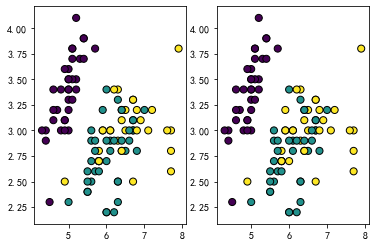

In [66]:
plt.figure()
plt.subplot(121)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train.reshape((-1)),edgecolors='k',s=50)
plt.subplot(122)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train_hat.reshape((-1)),edgecolors='k',s=50)

#### It can be seen that the changes in the left and right images are not obvious here because the scores of the test set and the training set are high, and the difference between the two scores is small, so the difference in the response is also small. For example, if the model is trained Set and test set results are very different, then the changes in the response to the image will be very intuitive.

## Summary：

#### This section compares the performance characteristics of the four SVM models: linear kernel SVM, Gaussian kernel SVM, polynomial kernel SVM, and sigmoid kernel SVM. Rate and show it in a more intuitive way.

# 3.SVM tuning in the pipeline

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target


number = 100
num = [] ; cv_score = [] ; test_score = []

for i in range(number):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=None,stratify=y)

    pipe = make_pipeline(StandardScaler(),
                        SVC())
    
    params = [{'svc__kernel': ['rbf'], 'svc__gamma': [1e-3, 1e-4],'svc__C': [1, 10, 100, 1000]},
            {'svc__kernel': ['linear'], 'svc__C': [1, 10, 100, 1000]},
            {'svc__kernel':['poly'],'svc__degree':[1,2,3,4,5],'svc__gamma': [1e-3, 1e-4],'svc__C':[1,10,100,1000]},
            {'svc__kernel':['sigmoid'],'svc__gamma': [1e-3, 1e-4],'svc__C':[1,10,100,1000]}
            ]

    grid = GridSearchCV(pipe,
                    param_grid=params,
                    cv=10)
    
    grid.fit(X_train,y_train)
    
    num.append(i+1)
    cv_score.append(grid.best_score_)
    test_score.append(grid.score(X_test,y_test))
    

print(cv_score)
print(test_score)

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.975, 0.975, 0.975, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.975, 0.975, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.95, 0.975, 0.9666666666666667, 0.975, 0.9833333333333333, 0.975, 0.9666666666666667, 0.9666666666666667, 0.9916666666666667, 0.9833333333333333, 0.975, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.975, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.975, 0.975, 0.9833333333333333, 0.9666666666666667, 0.975, 0.975, 0.9916666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.975, 0.975, 0.9833333333333333, 0.9583333333333334, 0.9666666666666667, 0.9916666666666667, 0.9666666666666667, 0.9666666666666667, 0.975, 0.975, 0.975, 0.975, 0.9833333333333333, 0.9666666666666667, 0.975, 0.9666666666666667, 0.975, 0.9833333333333333, 0.975, 0.9666666666666667, 0.9583333333333334, 0.9583333333333334, 0.9833333333

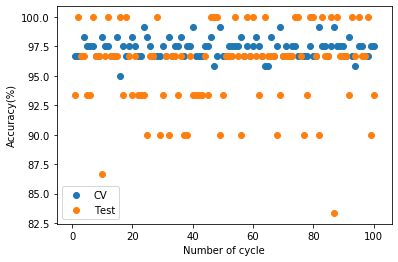

In [4]:
plt.scatter(num,list(map(lambda x:x*100,cv_score)),label='CV')
plt.scatter(num,list(map(lambda x:x*100,test_score)),label='Test')
plt.xlabel('Number of cycle')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

#### The above is the combination of the heuristics of the pipeline and KNN learned before, replacing the KNN model with the SVM model. At the same time, the parameters of the grid search are no longer the number of neighbor points and p value of the KNN, but instead become Kernel class, C value, gamma value, degree value.

## Summary：

#### It can be seen that in the final combination of this series, the best performance is a linear kernel, where the C value is 100. Here, the result of cross-validation may not be accurate enough. This is a place worth improving. We will continue to explore in the future. 